# This is a file demonstrating the running of autoDEER code

## Setup

In [1]:
import os,sys;
import XeprAPI
import deerlab as dl
import numpy as np
import time
# sys.path.append('/home/xuser/Desktop/huka/autoDeer/autoDeer')
from autoDeer.hardware import xepr_api as api
from autoDeer import Tunning as tune
import autoDeer.Param_Optimization as po
import autoDeer.DEER_4p as DEER


In [2]:
xepr=api() # This can only be run once per kernel
xepr.find_Xepr()
xepr.find_cur_exp()
xepr.find_hidden()

Can't find the current experiment. Attempting to load it
Experiment found


## Delay Optimisation

In [3]:
tune.tune(xepr,500,'main','R-')

temp directory already exists
Phase Aim = 0.000
Phase Setting = 1564.2 	 Phase = -0.25 	 Phase Dif = 0.25
Phase Setting = 2530.8 	 Phase = -3.11 	 Phase Dif = 3.11
Phase Setting = 966.7 	 Phase = 1.19 	 Phase Dif = 1.19
Phase Setting = 1536.4 	 Phase = -0.18 	 Phase Dif = 0.18
Phase Setting = 1372.7 	 Phase = 0.15 	 Phase Dif = 0.15
Phase Setting = 1217.6 	 Phase = 0.45 	 Phase Dif = 0.45
Phase Setting = 1448.7 	 Phase = 0.01 	 Phase Dif = 0.01
Phase Setting = 1451.3 	 Phase = 0.03 	 Phase Dif = 0.03
Phase Setting = 1421.3 	 Phase = 0.11 	 Phase Dif = 0.11
Phase Setting = 1438.2 	 Phase = 0.06 	 Phase Dif = 0.06
Phase Setting = 1446.4 	 Phase = 0.11 	 Phase Dif = 0.11


1448.7048677673627

In [5]:
data = xepr.acquire_dataset()
t = data.time
d = data.data
d0 = round(t[np.argmax(abs(d))]/2)*2 - 32/2 + 500
print(f"d0: {d0} ns")

d0: 664.0 ns


In [ ]:
po.main_run(xepr,[16,32],664,"SRSF1_H20_50K","/home/xuser/xeprFiles/Data/HUKA/2022/2022_03_16_SRSF1_H20_5pDEER_test/")

temp directory already exists


## DEER

In [3]:
pulse_lengths = 16
delays = [574,400,2800]
steps = [12,2,2]
avgs = [10,70,1]
api.run_4pDeer(cur_exp,pulse_lengths,delays,steps,avgs)

DEER Dimension changed to 231


1

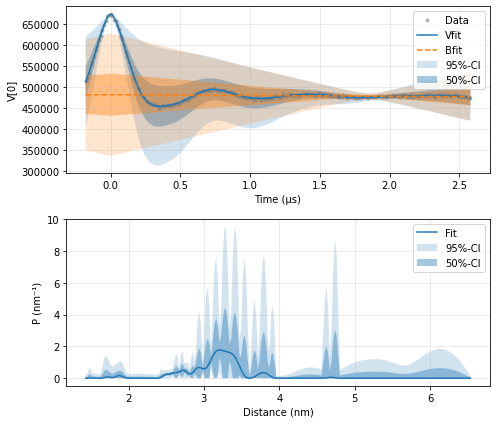

SNR=393.3293713634726
Mod=0.28480413188781206


In [43]:
[fit,sigma] = api.deerlab_next_scan()
fit.plot()
print(f'SNR={fit.V.max()/sigma}')
print(f'Mod={fit.exparam[0]}')

In [13]:
api.set_PulseSpel_var(cur_exp,"n",700)

In [32]:
fit.exparam[0]

0.28806796560316017

In [35]:
sigma

959.1444636518585

In [41]:
  cur_exp.getParam("NbScansToDo").value

700.0